In [1]:
import pandas as pd
import os
import json
import numpy as np



In [2]:
headers=["sentence_id", "sentence", "phrase_start", "phrase_end", 'phrase', 'num_native_annotator', "num_non_native_annotator", "num_complex_marks_native", "num_complex_marks_non_native", "complex_binary", "complex_prob"]

datasets=["../src/data/cwishareddataset/traindevset/english/Wikipedia_Dev.tsv","../src/data/cwishareddataset/traindevset/english/Wikipedia_Train.tsv", "../src/data/cwishareddataset/testset/english/Wikipedia_Test.tsv"]
dataset_names = ['Wikipedia_dev', "Wikipedia_train", "Wikipedia_test"]

data = pd.read_csv(os.path.abspath(datasets[0]), sep='\t', names=headers)
data

,sentence_id,sentence,phrase_start,phrase_end,phrase,num_native_annotator,num_non_native_annotator,num_complex_marks_native,num_complex_marks_non_native,complex_binary,complex_prob
0,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,4,8,tail,10,10,0,2,1,0.10
1,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,12,25,Epidexipteryx,10,10,6,3,1,0.45
2,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,31,35,bore,10,10,0,3,1,0.15
3,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,31,53,bore unusual vertebrae,10,10,0,1,1,0.05
4,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual ve...,36,53,unusual vertebrae,10,10,2,0,1,0.10
...,...,...,...,...,...,...,...,...,...,...,...
689,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of...,100,109,knowledge,10,10,0,2,1,0.10
690,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of...,74,80,person,10,10,0,0,0,0.00
691,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of...,95,99,true,10,10,0,0,0,0.00
692,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of...,113,122,purifying,10,10,7,8,1,0.75


In [3]:
def count_words(row):
    phrase = row['phrase']
    return len(phrase.split())

def get_words(data):
    data["complex_prob_str"] = data.apply(lambda row: format(row['complex_prob'], ".2f"), axis=1 )
    data['num_words'] = data.apply(lambda row: count_words(row), axis=1)
    words = data[data['num_words']==1]
    words['phrase'].str.lower()
    words['phrase'].str.strip()
    words = words.rename(columns={'complex_prob': 'reference_difficulty'})
    words = words.groupby('phrase')['reference_difficulty'].apply(max).reset_index()
    return words

def get_sentences(data):
    return data['sentence'].unique()
    
words = get_words(data)
words[['phrase', 'reference_difficulty']].sort_values(['reference_difficulty'], ascending=False)

sentences = get_sentences(data)
sentences


array(['The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .',
       'Epidexipteryx also preserved a covering of simpler body feathers , composed of parallel barbs as in more primitive feathered dinosaurs .',
       'However , unlike in modern-style rectrices ( tail feathers ) , the vanes were not branched into individual filaments but made up of a single ribbon-like sheet .',
       'It has been reported to be a maniraptoran dinosaur from the Middle Jurassic or Upper Jurassic age Daohugou Beds of Inner Mongolia , China ( about 160 or 168 mya ) .',
       "Epidexipteryx ( `` display feather '' ) is a genus of small paravian dinosaur , known from one fossil specimen in the collection of the Institute of Vertebrate Paleontology and Paleoanthropology in Beijing .",
       'Medicine recognizes that altitudes above 1,500 metres ( 4,900 ft ) start to affect humans , and there is no re

In [4]:
def get_text_and_metadata(data):

    sentences = get_sentences(data)
    words = get_words(data)
    
    text = " ".join(sentences.tolist())

    phrases = words['phrase'].to_list()
    weights = words['reference_difficulty'].to_list()
    

    word_weights = words[['phrase', 'reference_difficulty']]
    
    return text, word_weights


print(get_text_and_metadata(data))



("The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs . Epidexipteryx also preserved a covering of simpler body feathers , composed of parallel barbs as in more primitive feathered dinosaurs . However , unlike in modern-style rectrices ( tail feathers ) , the vanes were not branched into individual filaments but made up of a single ribbon-like sheet . It has been reported to be a maniraptoran dinosaur from the Middle Jurassic or Upper Jurassic age Daohugou Beds of Inner Mongolia , China ( about 160 or 168 mya ) . Epidexipteryx ( `` display feather '' ) is a genus of small paravian dinosaur , known from one fossil specimen in the collection of the Institute of Vertebrate Paleontology and Paleoanthropology in Beijing . Medicine recognizes that altitudes above 1,500 metres ( 4,900 ft ) start to affect humans , and there is no record of humans living at extreme altitudes above 5,500-6

In [5]:
directory = "../src/data/evaluation/" 

if not os.path.exists(directory):
    os.makedirs(directory)

texts, wordsets = [],[]
    
for name, dataset in zip(dataset_names, datasets):
    data = pd.read_csv(dataset, sep='\t', names=headers)
    text, wordset = get_text_and_metadata(data)

    texts.append(text)
    wordsets.append(wordset)
    
    with open(directory+name+".txt", "w")as f:
        f.write(text)
        
    wordset.to_csv(path_or_buf=directory+name+".csv")


In [6]:
from vocabulary_extraction.utils.output_utils.create_df_from_doc import create_df_from_doc
from vocabulary_extraction.pipeline.create_pipeline import create_pipeline

pipeline = create_pipeline()
doc = pipeline(texts[0])
df = create_df_from_doc(doc)
df


,token,lemma,appearance,difficulty,relative frequency,keyword score,example phrase,overall_ranking
36,paravian,paravian,1,0.889,0.685834,0.911400,Epidexipteryx ( `` display feather '' ) is a g...,4.264234
32,maniraptoran,maniraptoran,1,0.889,0.685834,0.911400,It has been reported to be a maniraptoran dino...,4.264234
8,pygostyle,pygostyle,1,0.889,0.685834,0.911400,The tail of Epidexipteryx also bore unusual ve...,4.264234
312,turīya,turīya,1,0.889,0.685834,0.747592,"Perceptible feeling - many people , when they ...",4.100426
93,librettist,librettist,1,0.765,0.685834,0.911400,The Festival was founded in 1948 by the compos...,3.892234
...,...,...,...,...,...,...,...,...
54,ways,way,1,0.280,0.000095,0.000000,There are several types of aviation altitude :...,0.840095
37,known,know,3,0.270,0.000476,0.000000,Acherontia atropos is the most widely-known of...,0.810476
124,saw,see,1,0.267,0.000095,0.000000,The 2007 enlargement of the European Union saw...,0.801095
29,like,like,1,0.236,0.000000,0.000000,"However , unlike in modern-style rectrices ( t...",0.708000


In [7]:
df.sort_values(by="relative frequency").head(50)



,token,lemma,appearance,difficulty,relative frequency,keyword score,example phrase,overall_ranking
149,ones,one,1,0.227,0.000000,0.000000,"For example , A0 denotes the hottest stars in ...",0.681000
310,people,people,1,0.279,0.000000,0.751565,"Perceptible feeling - many people , when they ...",1.588565
29,like,like,1,0.236,0.000000,0.000000,"However , unlike in modern-style rectrices ( t...",0.708000
303,great,great,1,0.297,0.000095,0.747592,"Mahavakya , or `` the great sentences '' , sta...",1.638688
97,home,home,1,0.302,0.000095,0.911400,The original intention was to provide a home f...,1.817495
80,end,end,1,0.313,0.000095,0.911400,It is at this point that the audience realizes...,1.850495
142,games,game,1,0.311,0.000095,0.000000,Tallari had an outstanding season in Mancheste...,0.933095
79,loves,love,1,0.303,0.000095,0.000000,It is at this point that the audience realizes...,0.909095
174,good,good,1,0.267,0.000095,0.747592,While some users can use them to circumvent ce...,1.548688
84,need,need,1,0.284,0.000095,0.000000,Bradamante and Ruggiero decide that they need ...,0.852095


In [11]:
from vocabulary_extraction.utils.evaluation_utils.evaluation import evaluate_ranking

df_res, correlation, drop = evaluate_ranking(wordsets[0], df)
df_res.sort_values(by='overall_ranking', axis=0, ascending=False, na_position="last").head(30)


,phrase,reference_difficulty,token,lemma,appearance,difficulty,relative frequency,keyword score,example phrase,overall_ranking,ranking_error
396,pygostyle,0.85,pygostyle,pygostyle,1.0,0.889,0.685834,0.911400,The tail of Epidexipteryx also bore unusual ve...,4.264234,0.03315
335,maniraptoran,0.60,maniraptoran,maniraptoran,1.0,0.889,0.685834,0.911400,It has been reported to be a maniraptoran dino...,4.264234,0.17340
373,paravian,0.45,paravian,paravian,1.0,0.889,0.685834,0.911400,Epidexipteryx ( `` display feather '' ) is a g...,4.264234,0.19755
483,turīya,0.30,turīya,turīya,1.0,0.889,0.685834,0.747592,"Perceptible feeling - many people , when they ...",4.100426,0.17670
320,librettist,0.90,librettist,librettist,1.0,0.765,0.685834,0.911400,The Festival was founded in 1948 by the compos...,3.892234,0.12150
472,thermodynamics,1.00,thermodynamics,thermodynamic,3.0,0.580,1.000000,0.975042,The laws of thermodynamics state that absolute...,3.715042,0.42000
343,mellifera,0.05,mellifera,mellifera,1.0,0.666,0.656893,0.751565,"Unlike the other species of Acherontia , it on...",3.406458,0.03080
405,rectrices,0.50,rectrices,rectrix,1.0,0.889,0.685834,0.000000,"However , unlike in modern-style rectrices ( t...",3.352834,0.19450
370,oviraptorosaurs,0.75,oviraptorosaurs,oviraptorosaur,1.0,0.889,0.685834,0.000000,The tail of Epidexipteryx also bore unusual ve...,3.352834,0.10425
490,unmolested,0.85,unmolested,unmolested,1.0,0.738,0.335015,0.747592,It is able to move about in hives unmolested b...,3.296608,0.09520


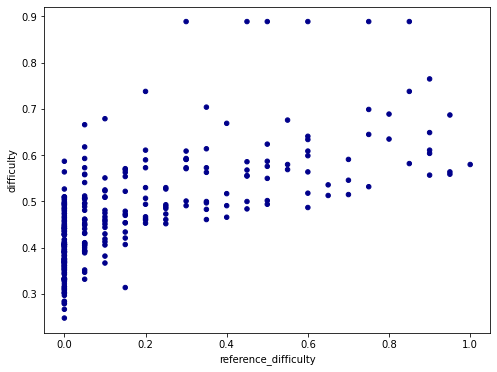

In [12]:
from vocabulary_extraction.utils.evaluation_utils.evaluation import get_difficulty_scatter

get_difficulty_scatter(df_res)

In [13]:
correlation

0.6834136968100372

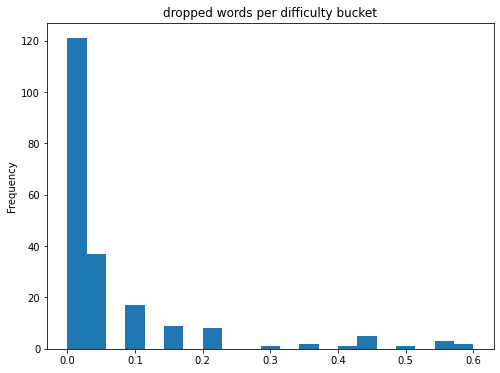

In [15]:
from vocabulary_extraction.utils.evaluation_utils.evaluation import get_dropped_histogram

get_dropped_histogram(df_res)

In [16]:
drop

0.02014492753623189